In [1]:
# Import essential libraries
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib


# Machine learning and preprocessing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.stats.mstats import trimmed_var
from sklearn.pipeline import make_pipeline

# Testing Model

In [2]:
def wrangle(filepath):
    # read csv file
    data = pd.read_csv(filepath)
    # load csv file into a data frame
    df = pd.DataFrame(data)
    # drop null values
    df.dropna(inplace = True)
    # remove duplicate files
    df.drop_duplicates(inplace = True)
    # drop redundant columns
    df.drop(columns = [ 'InvoiceNo'], inplace = True)
    # create the sales column
    df['sales'] = df['Quantity'] * df['UnitPrice']
    # drop redundant columns
    #df.drop(columns = ['Quantity', 'UnitPrice'], inplace = True)
    df['CustomerID'] = df['CustomerID'].astype(object)
    return df

In [3]:
filepath = 'customer_segmentation.csv/customer_segmentation_test1.csv'


In [4]:
df_test = wrangle(filepath)
df_test.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [5]:
df_test['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [6]:
df_test['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [7]:
df_test['CustomerID'].nunique()

4372

In [8]:
df_test.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [29]:
# instantiating the ordinal encoder
ord = OrdinalEncoder()

In [30]:
categorical = ['Description', 'Country', 'CustomerID', 'StockCode', 'InvoiceDate']
numeric_col =['sales', 'Quantity', 'UnitPrice']

In [31]:
# performing ml categotical encoding for the two categorical variables/fields
ord.fit(df_test[categorical])
test_cat_encoded = ord.transform(df_test[categorical])

In [32]:
# instanstiating standardscaler
Scaler = StandardScaler()

In [33]:

X = df_test[numeric_col]
Scaler.fit(X)
test_num_scaled = Scaler.transform(X)

In [34]:
X_test = np.hstack([test_cat_encoded, test_num_scaled])

In [35]:
with open('fitted_pca_1D.pkl', 'rb') as f:
    pca = pickle.load(f)
    print('fitted_pca loaded successfully')

fitted_pca loaded successfully


In [36]:
X_pca_test = pca.transform(X_test)

In [37]:
with open('final_pca_kmeans_model.pkl', 'rb') as f:
    kmeans_pca_model = pickle.load(f)
    print('model loaded successfully')

model loaded successfully


In [38]:
clusters = kmeans_pca_model.predict(X_pca_test)
df_test['predicted_cluster'] = clusters

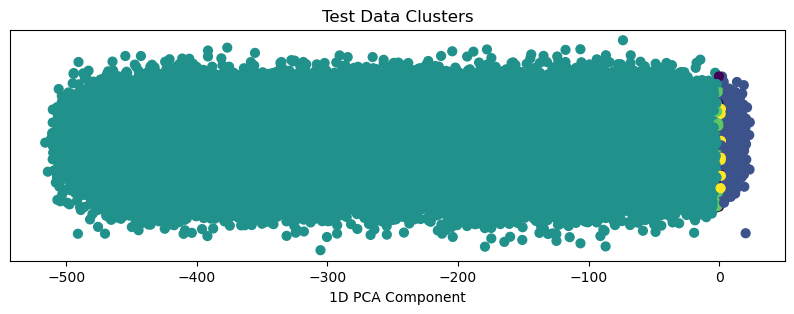

In [45]:
plt.figure(figsize = (10, 3))
y_jitter = np.zeros_like(X_pca_test.flatten()) + 0.01*np.random.randn(len(X_pca_test))
plt.scatter(X_pca_test.flatten(), y_jitter, c= clusters, s=40)
plt.yticks([])
plt.xlabel('1D PCA Component')
plt.title('Test Data Clusters')

plt.show()